In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
fr = pd.DataFrame()

flights_to_add = ['N139LB', 'N166LB', 'N211LB', 'N221LB', 'N225LB', 'N226LB', 'N235LB', 'N238LB', 'N252LB',\
                  'N271LB', 'N329LB', 'N789LB']

min_pts_list = ['4', '128', '256', '512', '1024', '1416']

for loon in flights_to_add:
    
    for mp in min_pts_list:

        aux = pd.read_csv('../../../../og_data/DBSCAN/' + 'eps2.5/' +  loon \
                          + '/CL-' + loon 
                          + '-mp_'+ str(mp) +  '.csv', \
                          parse_dates=['ts'], low_memory=False)

        aux['eps'] = 0.00039
        aux['min_pts'] = mp


        fr = fr.append(aux)
    
bl = fr

In [5]:
bl

,ts,aircraft_id,alt,speed,Direction,registration_id,lat,lon,cluster,eps,min_pts
0,2020-05-19 07:27:42+00:00,HBAL130,56100,17,128,N139LB,-10.661179,26.802853,0,0.00039,4
1,2020-05-19 07:28:44+00:00,HBAL130,56100,17,128,N139LB,-10.664337,26.807114,0,0.00039,4
2,2020-05-19 07:29:47+00:00,HBAL130,56200,17,128,N139LB,-10.667585,26.811316,0,0.00039,4
3,2020-05-19 07:30:50+00:00,HBAL130,56200,18,126,N139LB,-10.670792,26.815590,0,0.00039,4
4,2020-05-19 07:31:52+00:00,HBAL130,56100,18,126,N139LB,-10.674102,26.819891,0,0.00039,4
...,...,...,...,...,...,...,...,...,...,...,...
198609,2019-01-07 16:47:53+00:00,HBAL523,53600,1,315,N789LB,0.853088,-73.148972,-1,0.00039,1416
198610,2019-01-07 16:49:40+00:00,HBAL523,53700,2,225,N789LB,0.852676,-73.149536,-1,0.00039,1416
198611,2019-01-07 16:49:59+00:00,HBAL523,53700,2,225,N789LB,0.852465,-73.149719,-1,0.00039,1416
198612,2019-01-07 18:01:06+00:00,HBAL523,53500,9,161,N789LB,0.735901,-73.122437,-1,0.00039,1416


In [6]:
# Let's group some traces together and compute mean of their velocity vector to lower the impact of the
# unpredictability of the winds


In [7]:
#median_velocities = pd.DataFrame(columns=['registration_id', 'eps', 'min_pts', 'median_vel_cluster', 'median_vel_noise', \
                                  #        'davies_bouldin_score'])
median_velocities = pd.DataFrame()

for loon in flights_to_add:
    
    loon_info = bl.loc[bl.registration_id == loon][['registration_id', 'eps', 'min_pts', 'cluster', 'speed']]
    
    loon_median_vel = loon_info.groupby(['registration_id', 'cluster', 'eps', 'min_pts']).median()\
                                .reset_index()
    
    median_velocities = median_velocities.append(loon_median_vel)
    
    


In [8]:
median_velocities['stationary'] = median_velocities['cluster'].apply(lambda x: True if x != -1 else False)
median_velocities

,registration_id,cluster,eps,min_pts,speed,stationary
0,N139LB,-1,0.00039,1024,17.0,False
1,N139LB,-1,0.00039,128,36.0,False
2,N139LB,-1,0.00039,1416,15.0,False
3,N139LB,-1,0.00039,256,26.0,False
4,N139LB,-1,0.00039,4,22.0,False
...,...,...,...,...,...,...
231,N789LB,73,0.00039,128,20.0,True
232,N789LB,74,0.00039,128,16.0,True
233,N789LB,75,0.00039,128,11.0,True
234,N789LB,76,0.00039,128,5.0,True


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


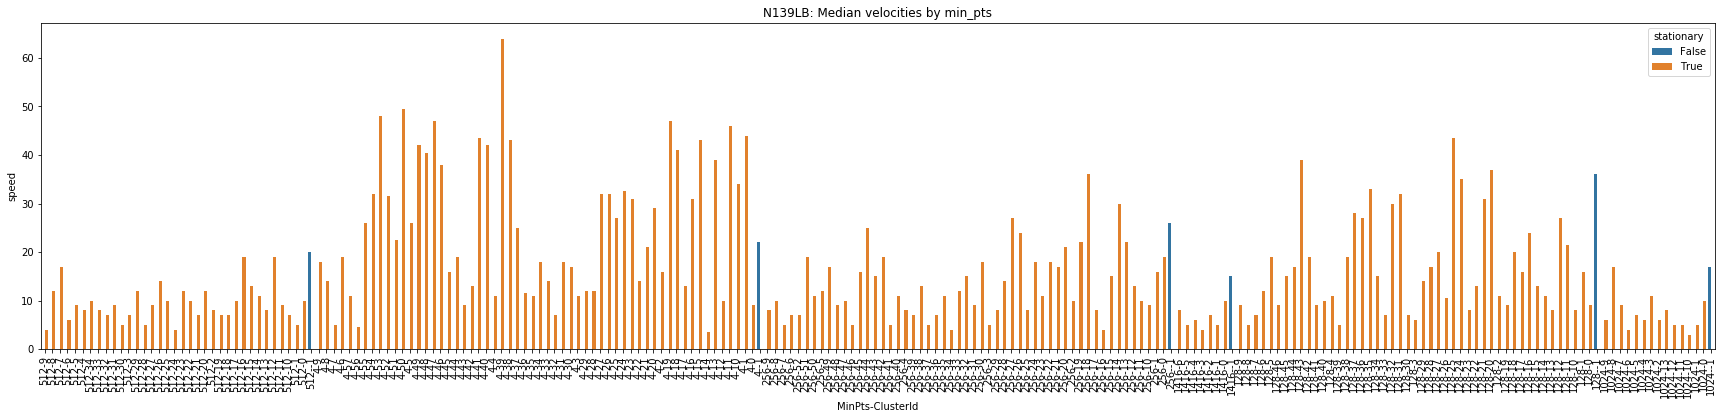

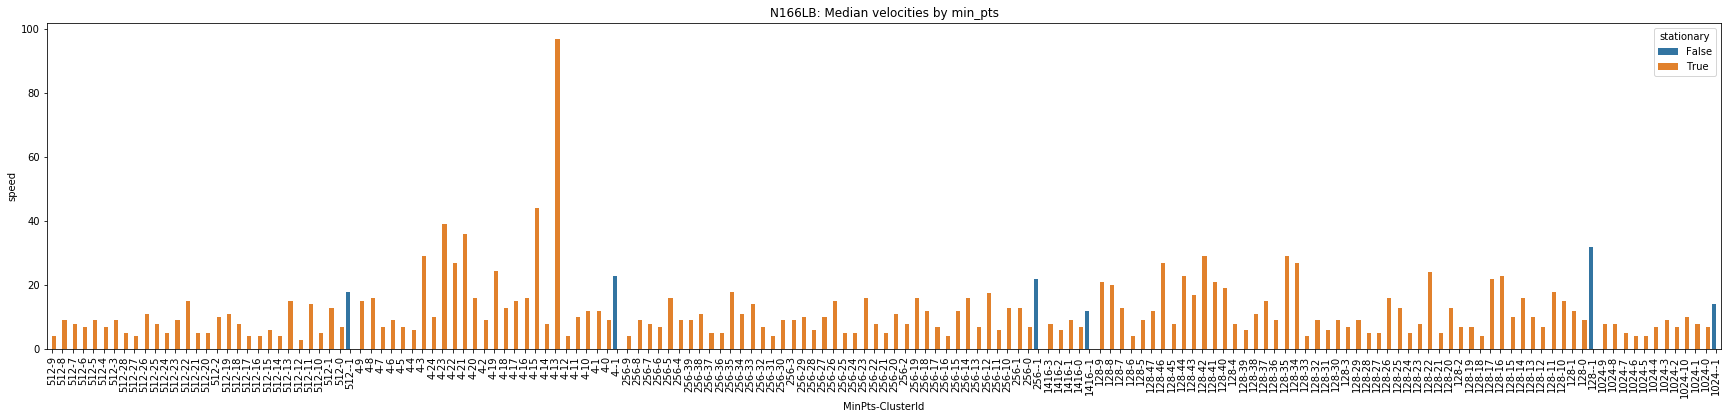

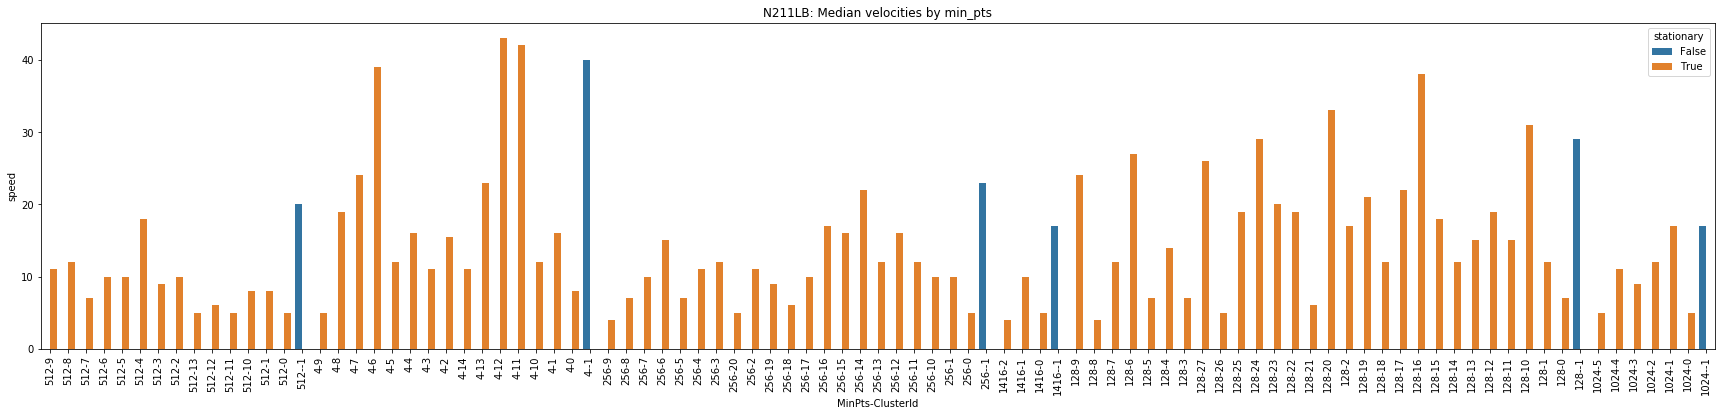

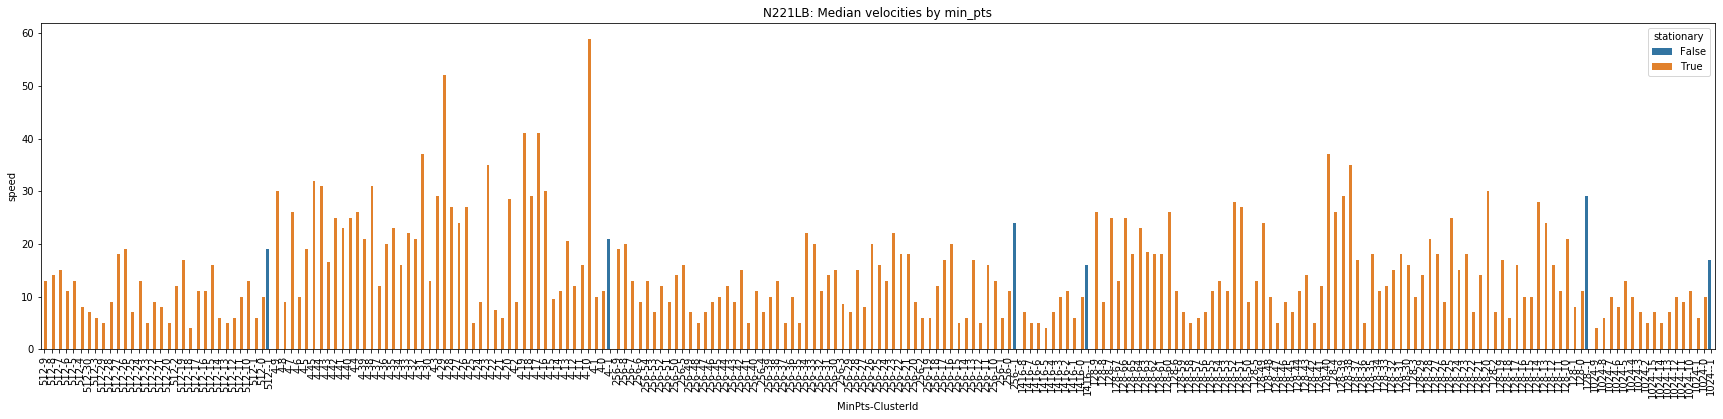

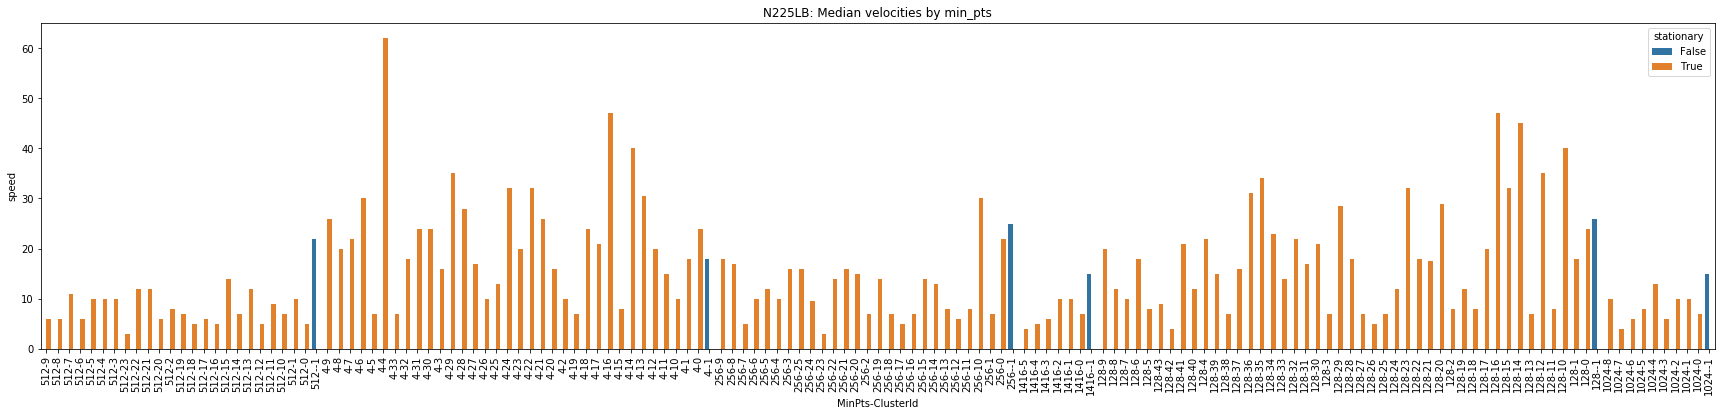

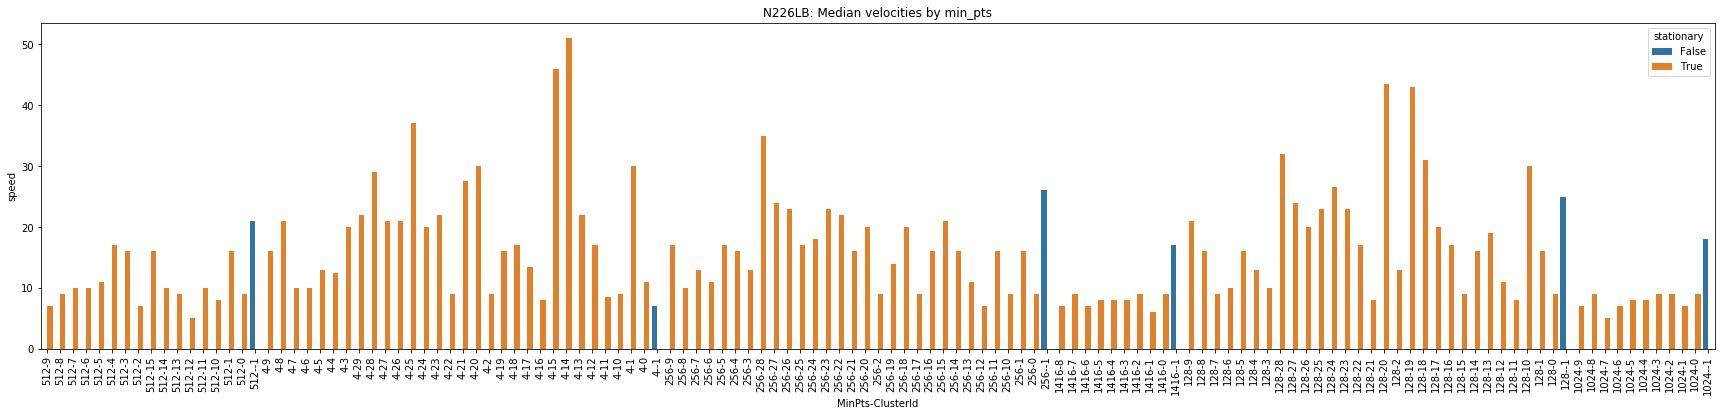

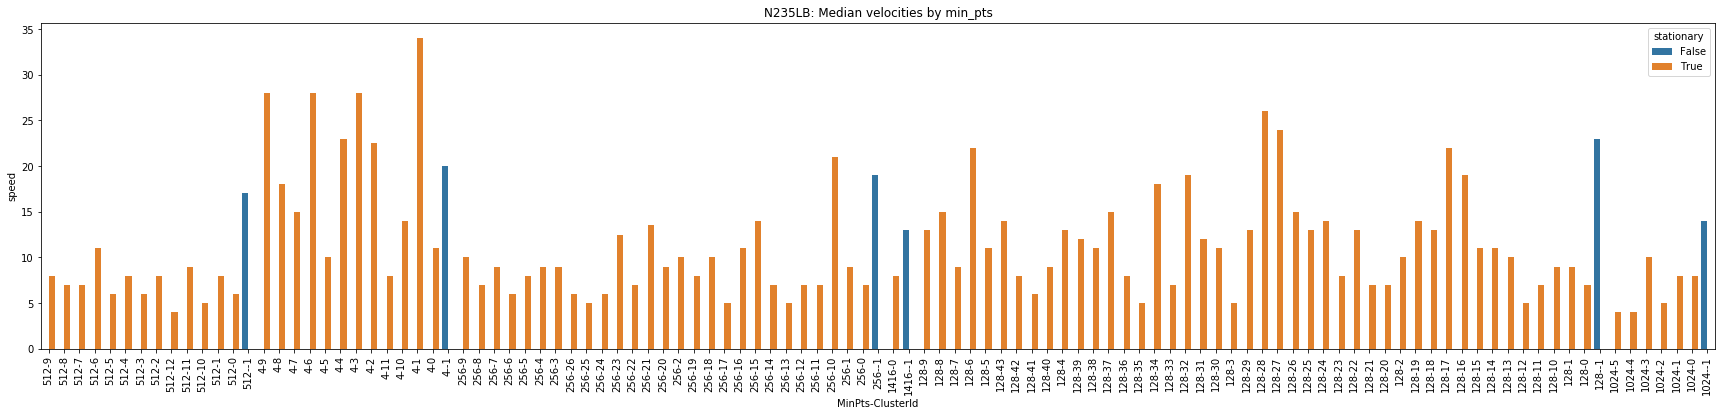

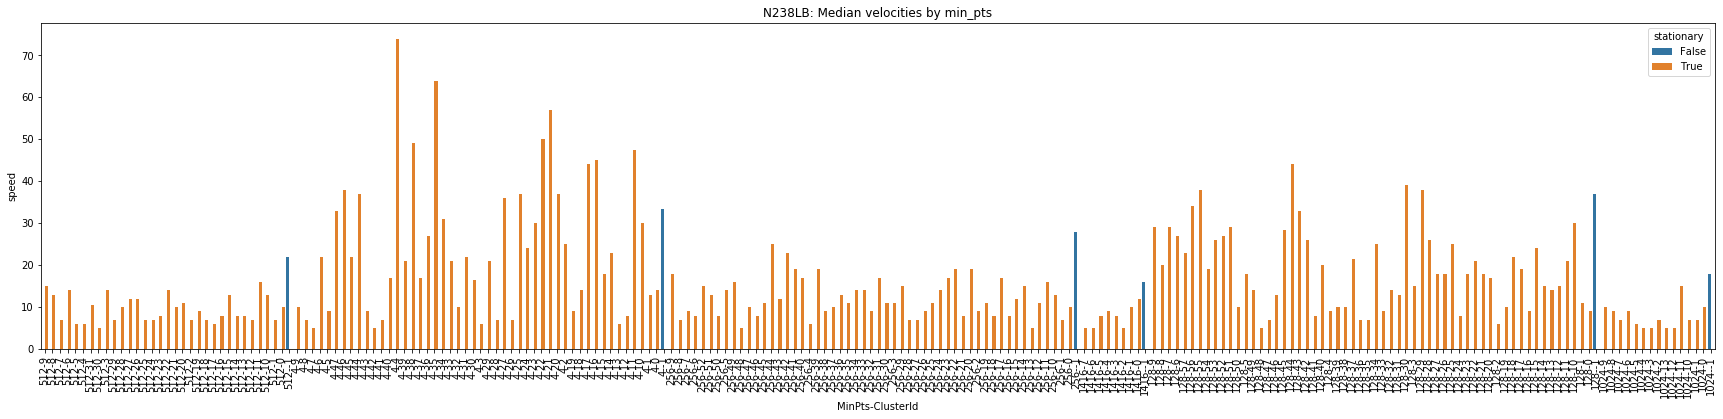

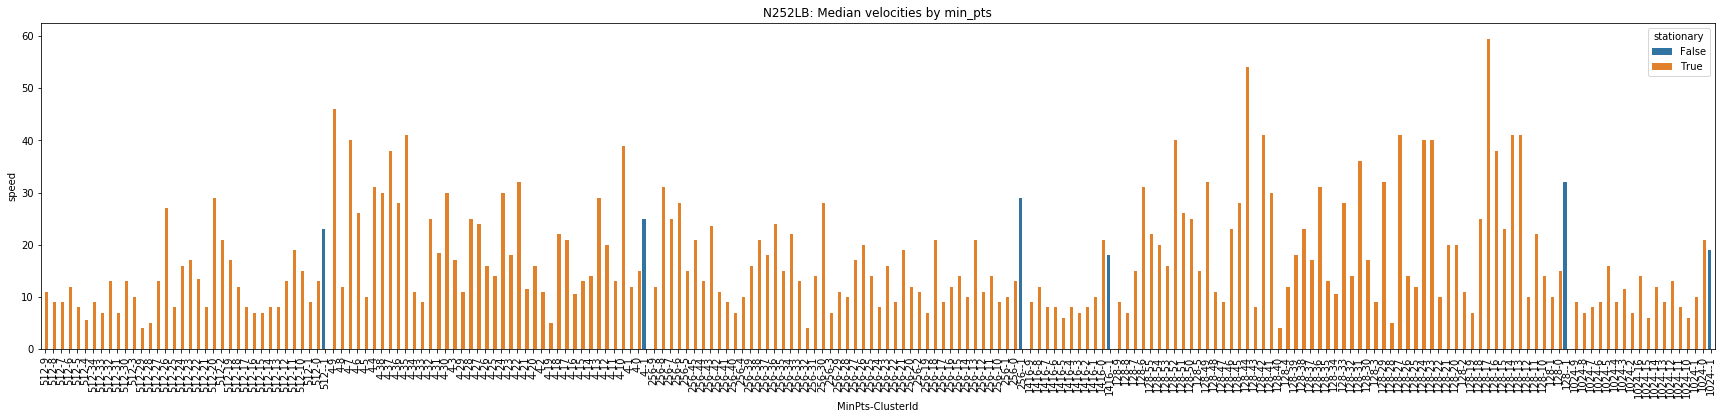

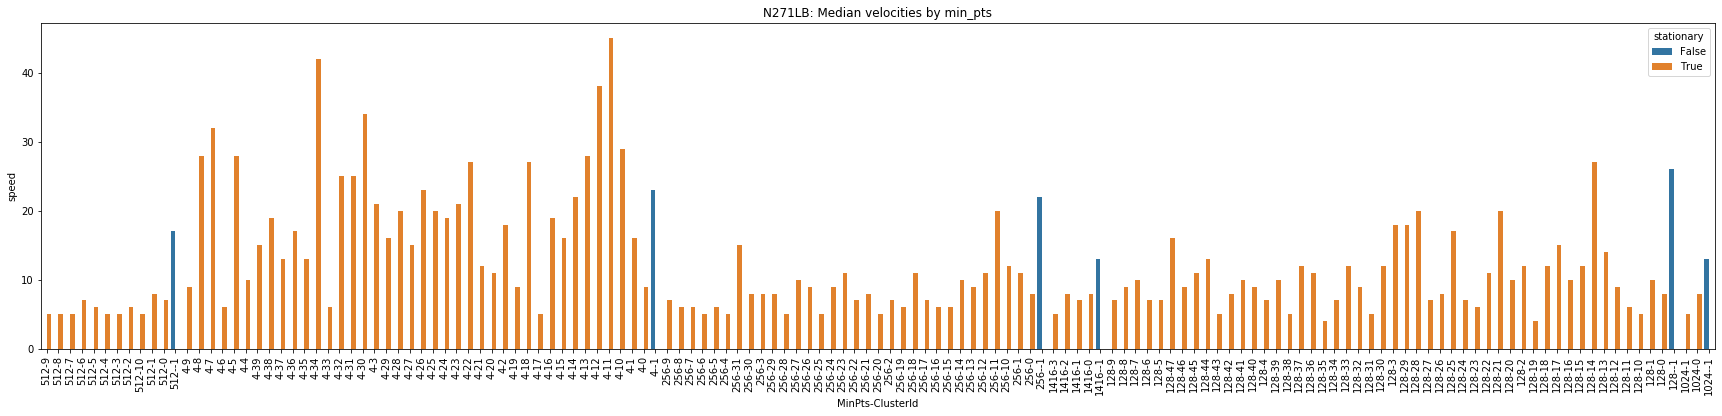

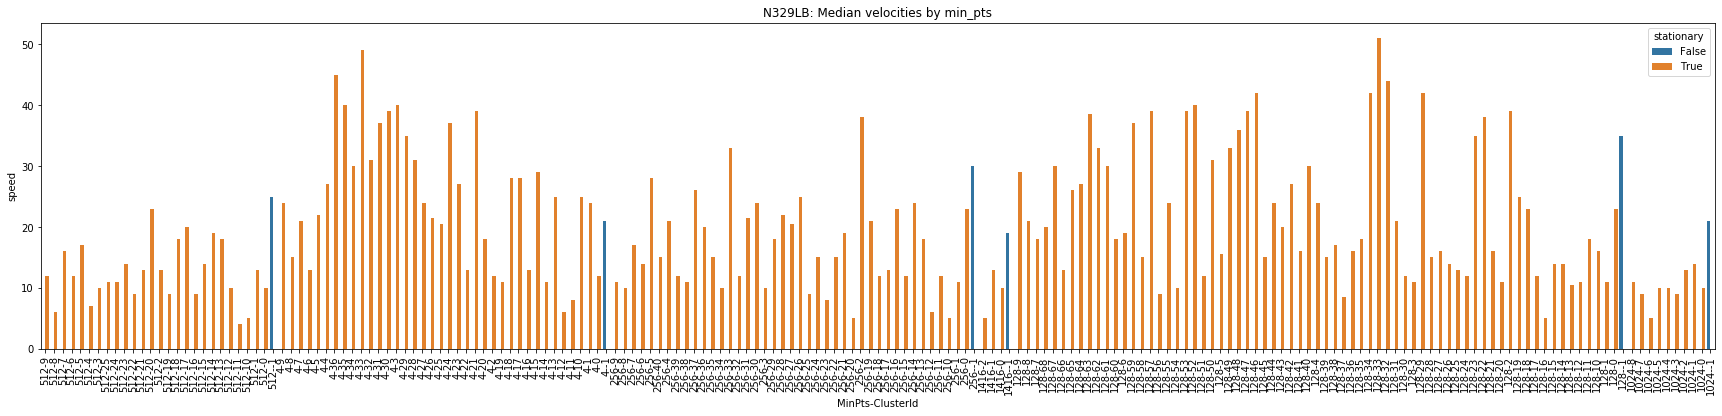

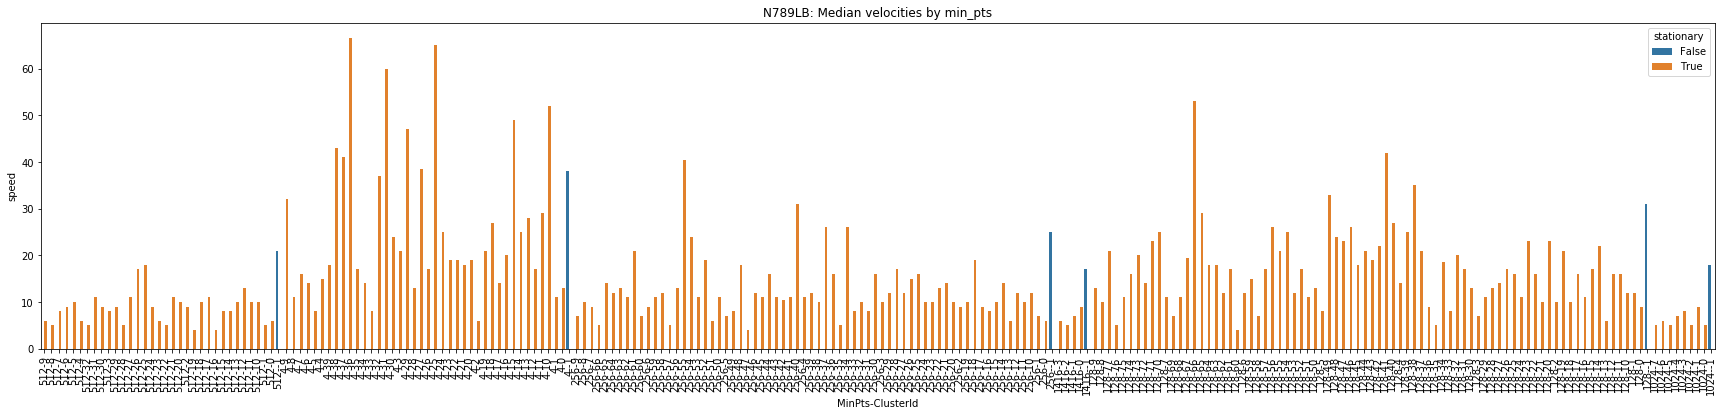

In [9]:


#['N211LB', 'N226LB', 'N235LB', 'N238LB', 'N252LB', 'N271LB', 'N329LB']

for loon in flights_to_add:
    
    target_median_velocities = median_velocities.loc[median_velocities.registration_id == loon]
    
    target_median_velocities['id_pts_clus'] =  target_median_velocities['min_pts'].astype(str)\
                                                .str.cat(target_median_velocities['cluster'].astype(str), sep='-')

    target_median_velocities = target_median_velocities.sort_values(by='id_pts_clus', ascending=False)

    plt.figure(loon, figsize=(30,6))

    ax = sns.barplot(x=target_median_velocities['id_pts_clus'], y="speed", hue='stationary', \
                    data=target_median_velocities)

    #ax.set(ylim=(0, 50))
    dummy = ax.set_ylabel('speed')
    dummy = ax.set_xlabel('MinPts-ClusterId')
    dummy = ax.set_title(loon + ': Median velocities by min_pts')
    dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    dummy = ax.tick_params(labelsize=10)

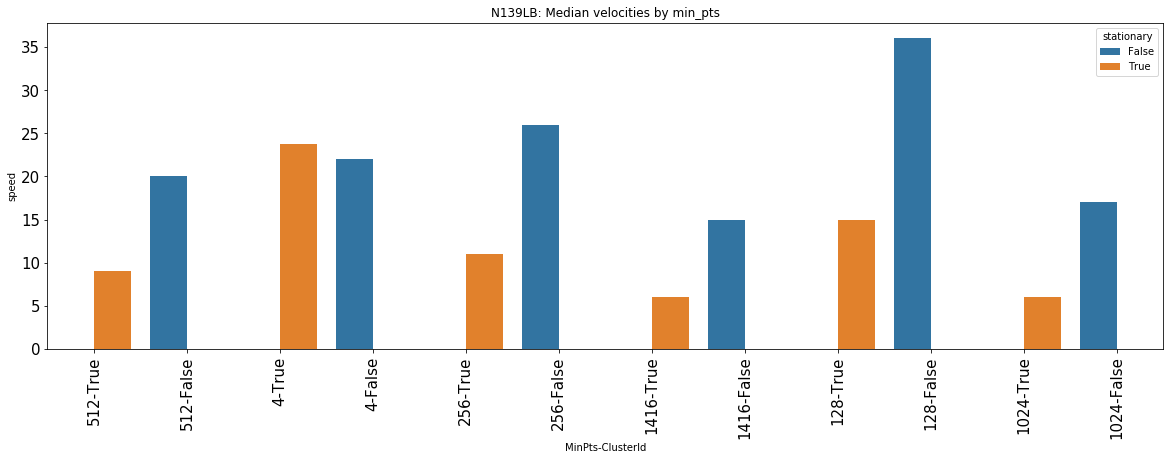

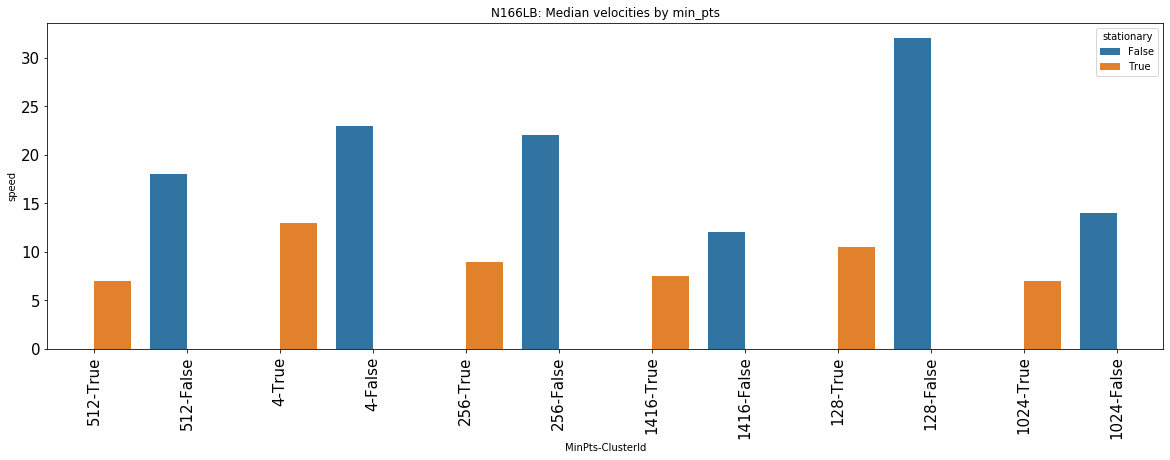

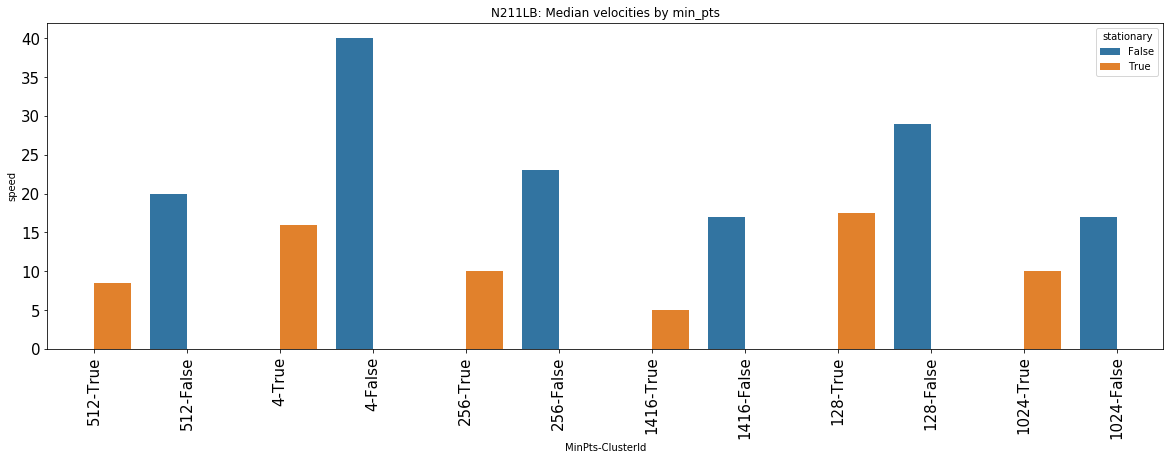

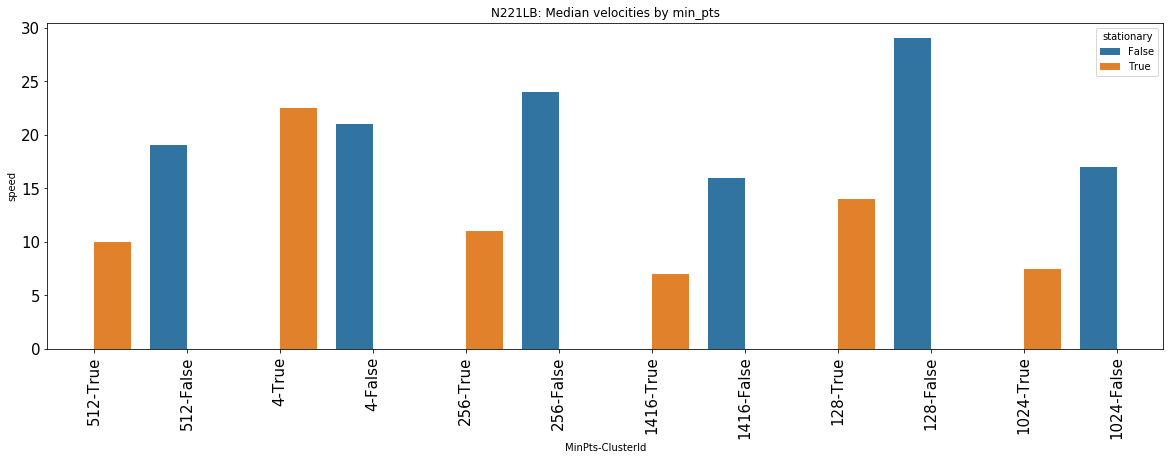

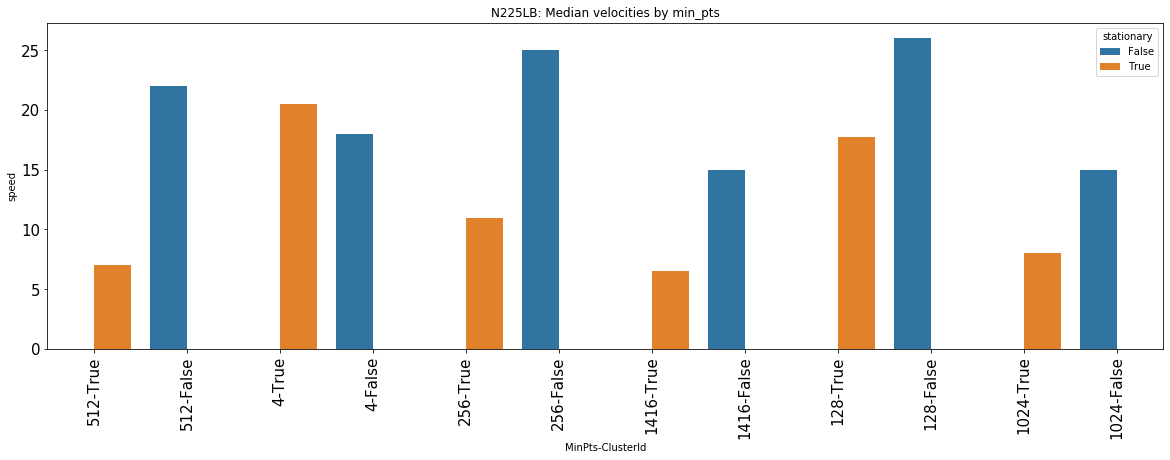

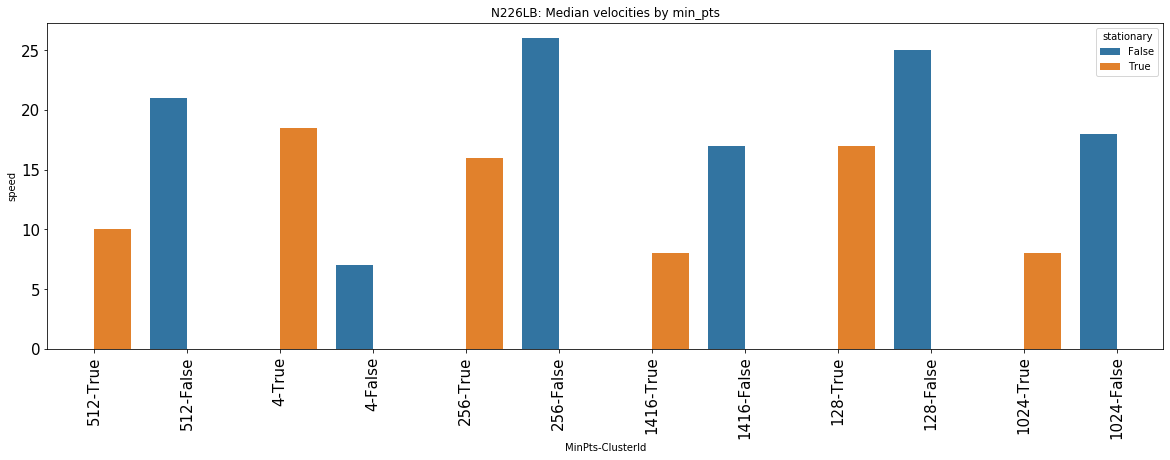

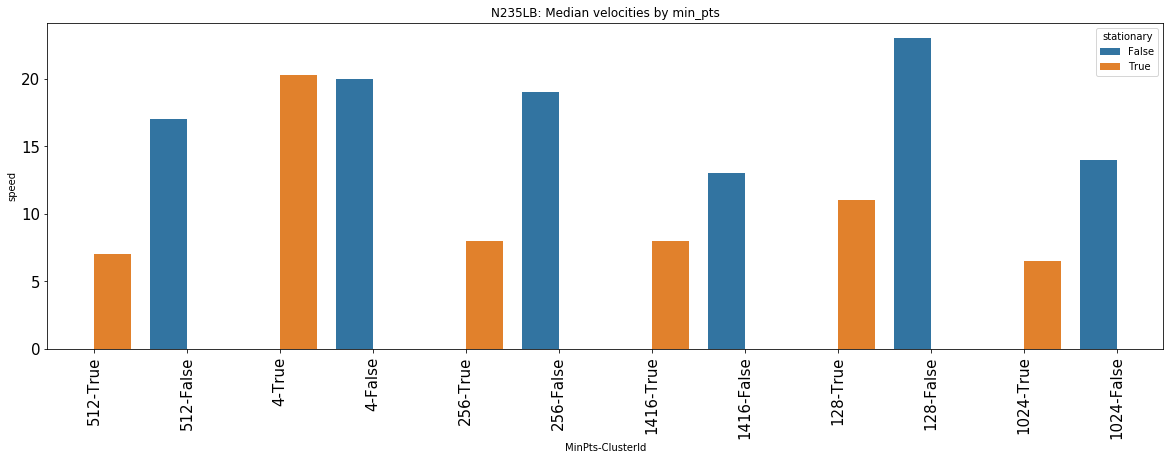

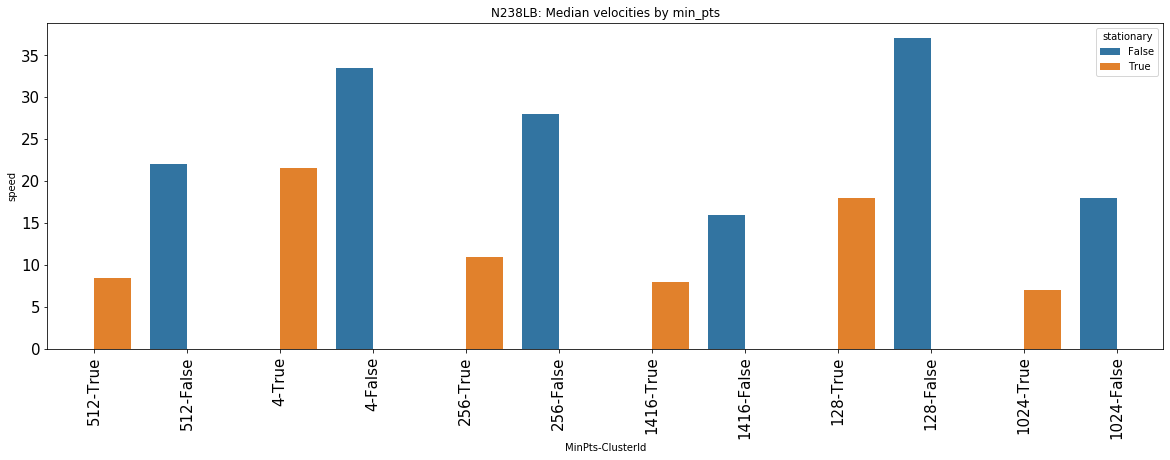

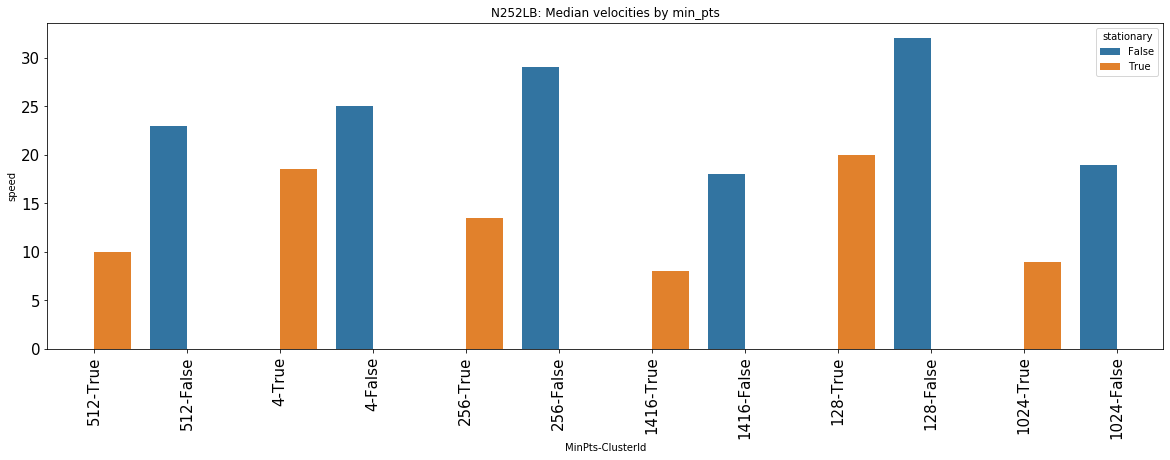

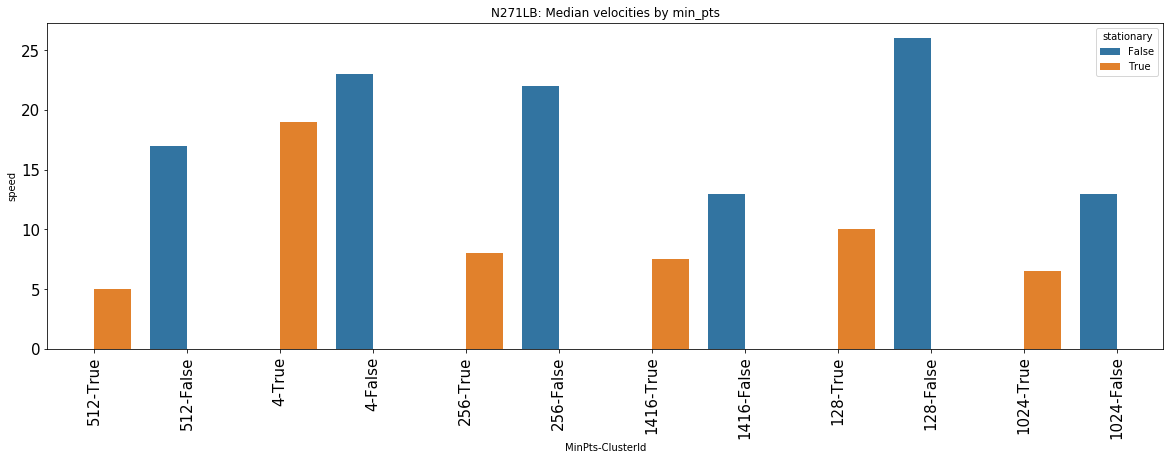

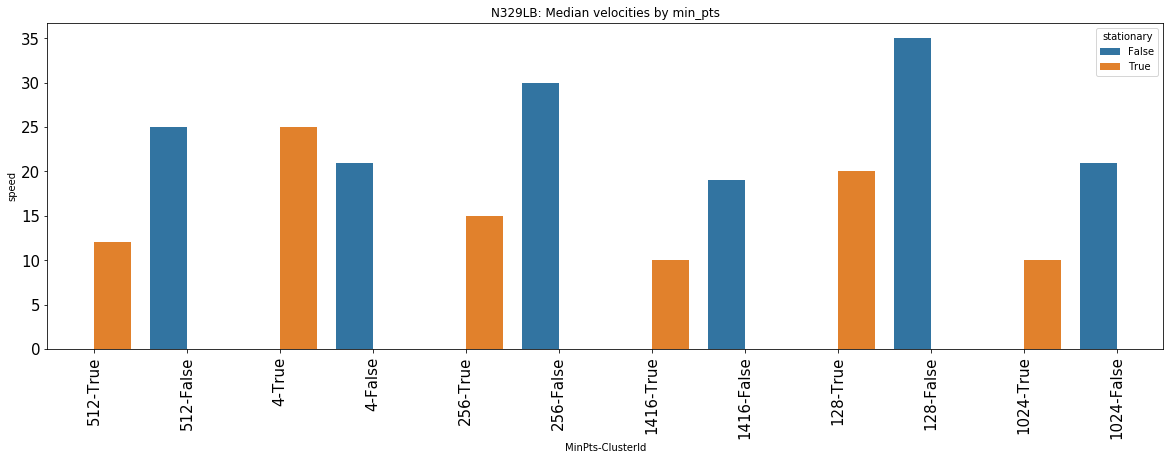

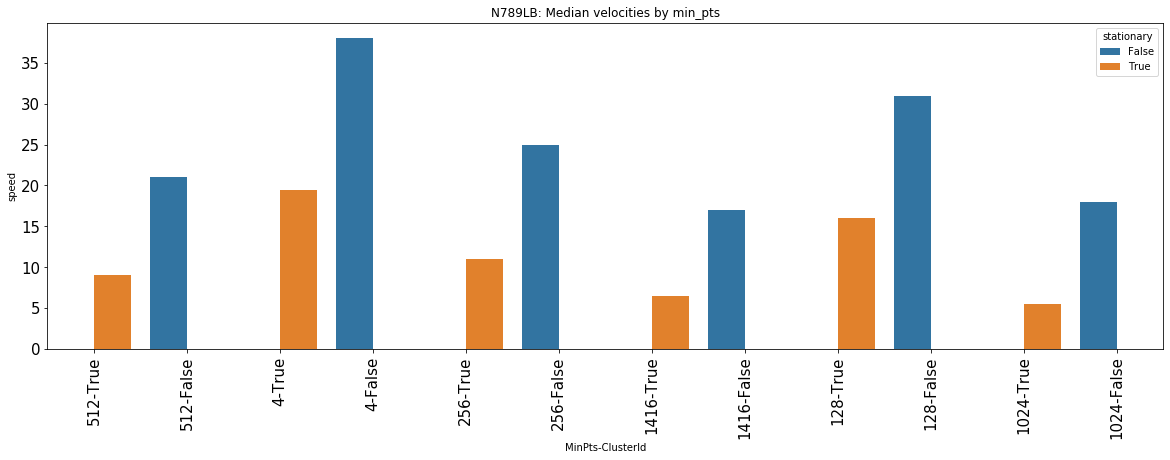

In [10]:
#['N211LB', 'N226LB', 'N235LB', 'N238LB', 'N252LB', 'N271LB', 'N329LB']
complete_stationary_velocites = pd.DataFrame()

for loon in flights_to_add:
    
    target_stationary_velocities = median_velocities.loc[median_velocities.registration_id == loon]\
                                    .groupby(['registration_id', 'eps', 'min_pts', 'stationary'])\
                                    .median().reset_index()
    
    target_stationary_velocities['id_pts_stationary'] =  target_stationary_velocities['min_pts'].astype(str)\
                                                            .str.cat(target_stationary_velocities['stationary']\
                                                                        .astype(str), sep='-')
    
    target_stationary_velocities = target_stationary_velocities.sort_values(by='id_pts_stationary',\
                                                                            ascending=False)
    
    complete_stationary_velocites = complete_stationary_velocites.append(target_stationary_velocities)
    
    plt.figure(loon, figsize=(20,6))

    ax = sns.barplot(x=target_stationary_velocities['id_pts_stationary'], y="speed", hue='stationary', \
                    data=target_stationary_velocities)

    #ax.set(ylim=(0, 50))
    dummy = ax.set_ylabel('speed')
    dummy = ax.set_xlabel('MinPts-ClusterId')
    dummy = ax.set_title(loon + ': Median velocities by min_pts')
    dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    dummy = ax.tick_params(labelsize=15)

In [20]:
complete_stationary_velocites.sort_values(['id_pts_stationary', 'registration_id'])


,registration_id,eps,min_pts,stationary,cluster,speed,id_pts_stationary
0,N211LB,0.00039,1024,False,-1.0,17.0,1024-False
0,N226LB,0.00039,1024,False,-1.0,18.0,1024-False
0,N235LB,0.00039,1024,False,-1.0,14.0,1024-False
0,N238LB,0.00039,1024,False,-1.0,18.0,1024-False
0,N252LB,0.00039,1024,False,-1.0,19.0,1024-False
...,...,...,...,...,...,...,...
11,N238LB,0.00039,512,True,15.5,8.5,512-True
11,N252LB,0.00039,512,True,17.0,10.0,512-True
11,N271LB,0.00039,512,True,5.0,5.0,512-True
11,N329LB,0.00039,512,True,12.5,12.0,512-True
